In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# tf.random.set_seed(42)
# np.random.seed(42)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
num_rows = 2
num_cols = 4
num_images = num_rows * num_cols

In [6]:
random_indices = np.random.choice(len(train_images), num_images, replace=False)

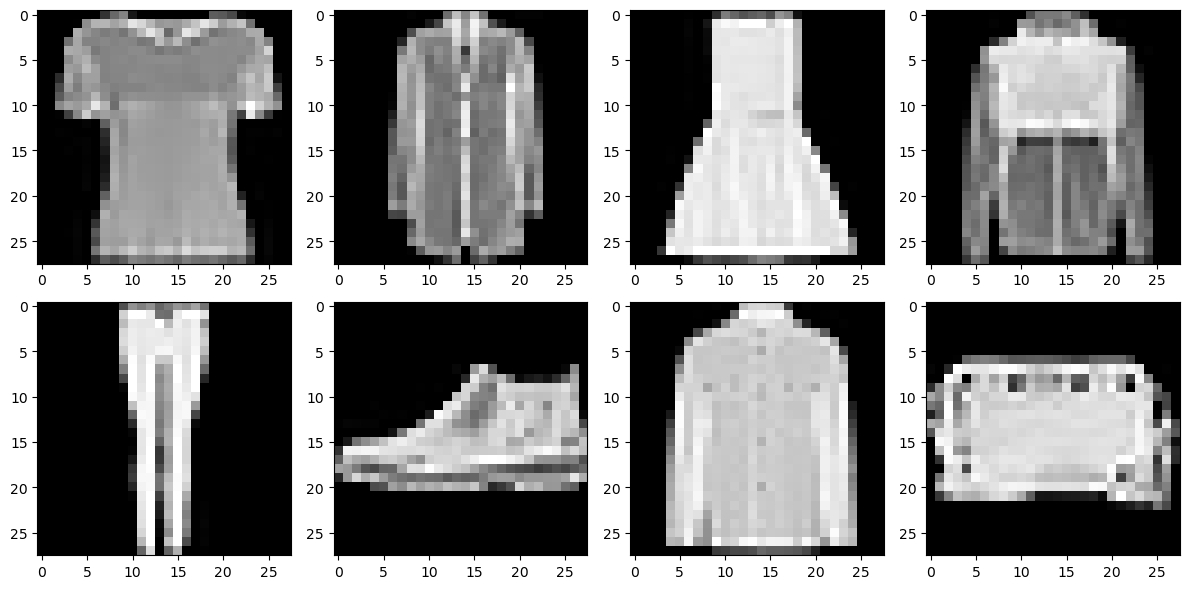

In [7]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for j in range(num_images):
    idx = random_indices[j] 
    ax = axes[j // num_cols, j % num_cols]
    ax.imshow(train_images[idx], cmap='gray')
plt.tight_layout()

# Baseline DNN

In [8]:
# normalize train and test images
train_norm = train_images / 255.0
test_norm = test_images / 255.0

In [10]:
# convert labels to one-hots
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [26]:
# define model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [27]:
# compile model
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

In [30]:
# train model
history = model.fit(train_norm, train_labels,  epochs=25, validation_data=(test_norm, test_labels), callbacks=[callbacks])

Epoch 1/25
1875/1875 [==============================] - 1s 427us/step - loss: 0.5087 - accuracy: 0.8255 - val_loss: 0.5504 - val_accuracy: 0.8115
Epoch 2/25
1875/1875 [==============================] - 1s 426us/step - loss: 0.5062 - accuracy: 0.8256 - val_loss: 0.5562 - val_accuracy: 0.8094
Epoch 3/25
1875/1875 [==============================] - 1s 432us/step - loss: 0.5011 - accuracy: 0.8275 - val_loss: 0.5433 - val_accuracy: 0.8176
Epoch 4/25
1832/1875 [============================>.] - ETA: 0s - loss: 0.4989 - accuracy: 0.8297
Loss is lower that 50%: STOPPING!
1875/1875 [==============================] - 1s 428us/step - loss: 0.4992 - accuracy: 0.8296 - val_loss: 0.5350 - val_accuracy: 0.8180


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


# Custom Callback

In [24]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.5):
            print('\nLoss is lower that 50%: STOPPING!')
            self.model.stop_training = True

In [25]:
callbacks = myCallback()